<a href="https://colab.research.google.com/github/Shirohige7/mooreRegression/blob/main/moore_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
#pandas is to load tabular data
import matplotlib.pyplot as plt
#create line charts and scatterplots
import numpy as np
#matrixes,tensors,arrays

In [3]:
#get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-10-24 09:47:57--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-10-24 09:47:57 (36.4 MB/s) - ‘moore.csv’ saved [2302/2302]



**Το παραπάνω dataset είναι ο νόμος του moore :**

Ο "Νόμος του Moore" αναφέρει ότι ο αριθμός των τρανζίστορ που μπορούν να τοποθετηθούν σε ένα ολοκληρωμένο κύκλωμα (IC) διπλασιάζεται περίπου κάθε δώδεκα με δεκαοκτώ μήνες. Αυτό σημαίνει ότι η πυκνότητα τρανζίστορ σε ένα IC αυξάνεται ραγδαία, ενώ ταυτόχρονα οι διαστάσεις των τρανζίστορ μικραίνουν. Αυτή η τάση συνέχισε να ισχύει για πολλές δεκαετίες.

In [4]:
#load the data with pandas
data = pd.read_csv('moore.csv', header=None).to_numpy()
#loading the data(read_csv) without a header(head=None) from a csv and transforming it to an array(to_numpy)

In [5]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [6]:
X = data[:,0].reshape(-1, 1)
#taking the first column of the data array and reshaping it to a 2D array with one column
Y = data[:,1]

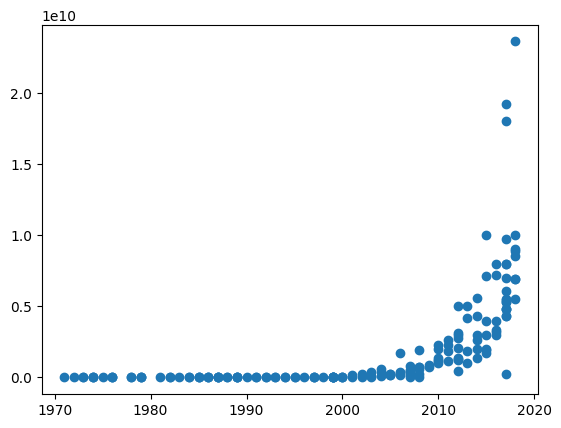

In [7]:
plt.scatter(X,Y);
#exponential growth of computing power

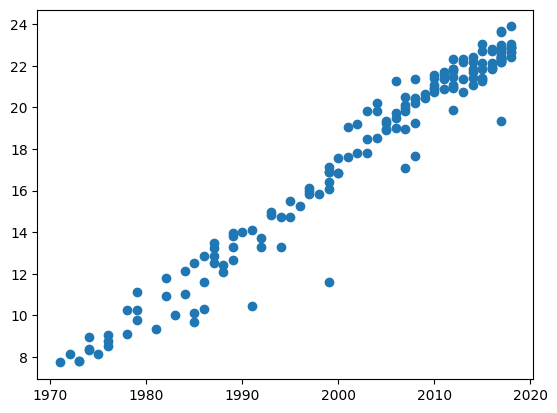

In [8]:
#turning the exponential growth into linear
Y = np.log(Y)
#now Y has logarithmic values
plt.scatter(X,Y)
#we see from the graph that we turn exponential growth to linear

In [9]:
X = X - X.mean() #mean is the average of all elements in the X array
#we do X-X.mean to scale our data

In [10]:
model = tf.keras.models.Sequential([   #creates a sequential model (linear stack of layers in Keras) initialized as an empty list
    tf.keras.layers.Input(shape=(1,)), #adds an input layer and defines the shape the model will expect
                                       #specifies the input data should have the shape (1,)one dimensional
    tf.keras.layers.Dense(1),          #adds a Dense layer(neural network layer) that connects each neuron to the previous layer
])                                     #this layer will performa linear transformation of the input(apply a weighted sum and produce a single output)

In [11]:
model.compile( #configures the training process of the NN before training it
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9), #specifies optimizers and takes two arguments (learning rate, momentum)
    loss='mse', #loss function to to be used during traing(mse is a common loss function for regression problems)
)

In [12]:
def schedule(epoch, lr):#defining a function that takes epoch and learning rate as input
  if epoch >= 50: #for the first 50 epochs the learning rate is higher and after 50 epochs learning rate lowers
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule) #sets up a schedulers to define the learning rate during training
#improves convergence and controls the learning proccess

In [13]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])
#trains the model we set up earlier (X input Y labels), epoch is one complete pass from the entire dataset
#callbacks calling the scheduler function to define the learning rate

Epoch 1/200
6/6 [==============================] - 1s 4ms/step - loss: 424.3001 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 330.5494 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 234.1979 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 214.3088 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 146.8286 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 124.1665 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 83.8338 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 61.7083 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 47.5069 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 33.9607 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 4ms/step - loss: 2

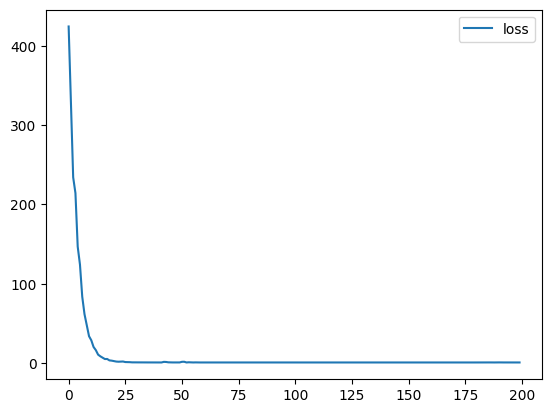

In [14]:
#plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend();

In [15]:
model.layers

In [16]:
model.layers[0].get_weights()
#the outpout tells us how fast the transistor is going

[array([[0.33142865]], dtype=float32), array([17.748713], dtype=float32)]

In [17]:
a = model.layers[0].get_weights()[0][0,0]

In [18]:
a

0.33142865

In [19]:
print('Time to double:', np.log(2)/a)

Time to double: 2.0913918780036154


In [20]:
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean() * X.sum())/denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
print(a, b)

0.341682487387313 17.764939393631764


6/6 [==============================] - 0s 2ms/step


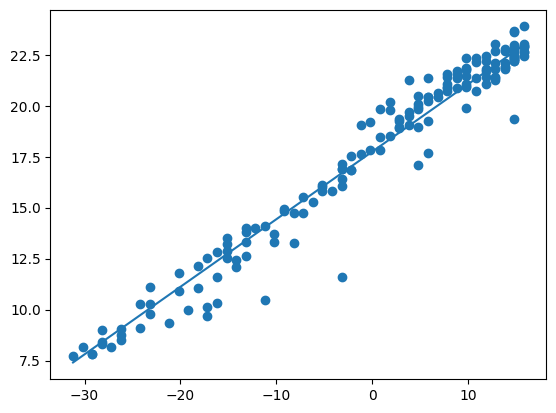

In [21]:
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat)
#make sure the line fits our data

In [22]:
#Manual calculation
w,b = model.layers[0].get_weights()
#Get the weights
X = X.reshape(-1,1)
# (N*1) * (1*1) + (1) --> (N*1)
Yhat2 = (X.dot(w) + b).flatten()
#Dont't use == for floating points
np.allclose(Yhat, Yhat2)

True